In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
timestamps = []
with open('../../data/Delhi_labeled_multimodal.pkl', "rb") as fp:
    for data_point in pkl.load(fp):
        if data_point['timestamp'] >= 500:
            timestamps.append(data_point['timestamp'])

In [3]:
with open('./Results/CNN_ICKy_ensemble_temporal.pkl', 'rb') as fp:
    cnn_icky_res = pkl.load(fp)
    
df = pd.DataFrame({
    'y_true': cnn_icky_res['true_vals'], 
    'y_pred_mean': cnn_icky_res['pred_vals'], 
    'y_pred_std': cnn_icky_res['pred_vals_std'], 
    't': np.array(timestamps)
}).sort_values(by='t', ignore_index=True)
df_agg = df.groupby('t')['y_pred_std'].agg(['min','idxmin'])
y_pred_std, indices = np.array(df_agg['min']), np.array(df_agg['idxmin'])
y_pred_mean = np.array(df.filter(indices,axis=0)['y_pred_mean'])
y_true = np.array(df.filter(indices,axis=0)['y_true'])
t = np.array(df.filter(indices,axis=0)['t'])

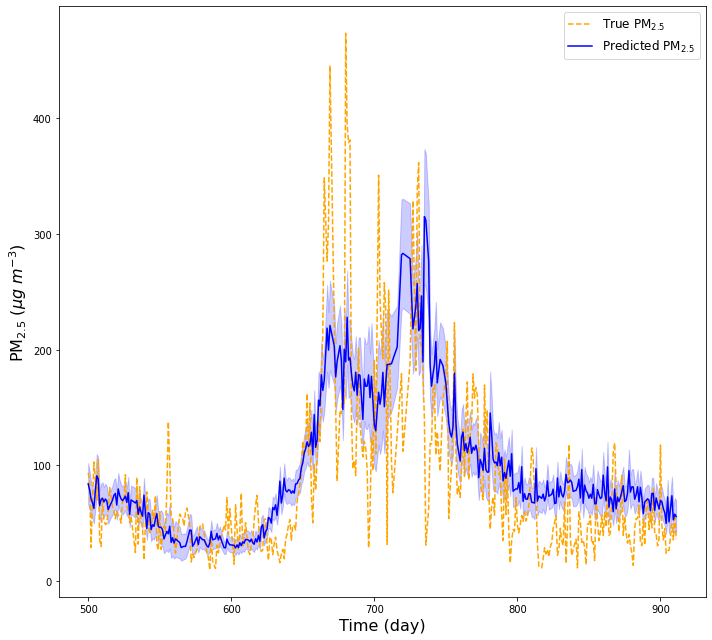

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
ax.plot(t, y_true, color='orange', ls='--', label='True PM$_{2.5}$')
ax.plot(t, y_pred_mean, color='blue', ls='-', label='Predicted PM$_{2.5}$')
ax.fill_between(t, y_pred_mean - 2*y_pred_std, y_pred_mean + 2*y_pred_std, color='blue', alpha=0.2)
ax.set_xlabel('Time (day)', fontsize=16)
ax.set_ylabel('PM$_{2.5}$ ($\mu g$ $m^{-3}$)', fontsize=16)
ax.legend(prop={'size': 12})
plt.tight_layout()
if os.path.exists('./Figures/'):
    plt.savefig('./Figures/Time_series_visualization_CNN_ICKy.pdf')

In [6]:
with open('./Results/DeepViT_ICKy_ensemble_temporal.pkl', 'rb') as fp:
    deepvit_icky_res = pkl.load(fp)
    
df = pd.DataFrame({
    'y_true': deepvit_icky_res['true_vals'], 
    'y_pred_mean': deepvit_icky_res['pred_vals'], 
    'y_pred_std': deepvit_icky_res['pred_vals_std'], 
    't': np.array(timestamps)
}).sort_values(by='t', ignore_index=True)
df_agg = df.groupby('t')['y_pred_std'].agg(['min','idxmin'])
y_pred_std, indices = np.array(df_agg['min']), np.array(df_agg['idxmin'])
y_pred_mean = np.array(df.filter(indices,axis=0)['y_pred_mean'])
y_true = np.array(df.filter(indices,axis=0)['y_true'])
t = np.array(df.filter(indices,axis=0)['t'])

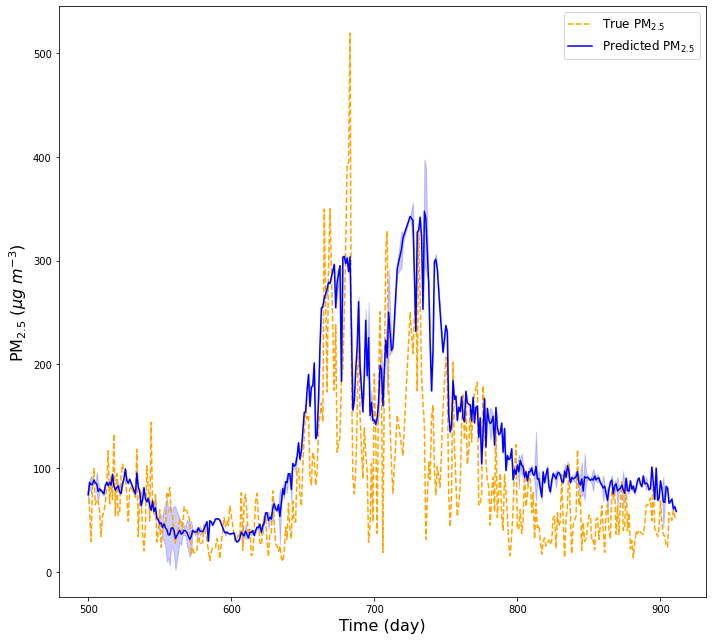

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
ax.plot(t, y_true, color='orange', ls='--', label='True PM$_{2.5}$')
ax.plot(t, y_pred_mean, color='blue', ls='-', label='Predicted PM$_{2.5}$')
ax.fill_between(t, y_pred_mean - 2*y_pred_std, y_pred_mean + 2*y_pred_std, color='blue', alpha=0.2)
ax.set_xlabel('Time (day)', fontsize=16)
ax.set_ylabel('PM$_{2.5}$ ($\mu g$ $m^{-3}$)', fontsize=16)
ax.legend(prop={'size': 12})
plt.tight_layout()
if os.path.exists('./Figures/'):
    plt.savefig('./Figures/Time_series_visualization_DeepViT_ICKy.pdf')

In [13]:
import sys
sys.path.insert(0, '../../')
from kernels.nn import ImplicitConvNet2DKernel, ImplicitDeepViTKernel

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [14]:
cnn = ImplicitConvNet2DKernel(
    input_width=224, 
    input_height=224, 
    in_channels=3, 
    num_blocks=2, 
    latent_feature_dim=16
)
count_parameters(cnn)

1915728

In [27]:
deepvit = ImplicitDeepViTKernel(
    input_width=224, 
    input_height=224, 
    patch_size=32, 
    num_blocks=2, 
    latent_feature_dim=16
)
count_parameters(deepvit)

21803576